In [18]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import sys 
sys.path.append("../../") 
from compare_algorithms.utils import create_dataset
%matplotlib notebook

In [19]:
filename = '../../data/week_data/data/washingtong_winter_20120101-20120107新.csv'
x_train, y_train, x_test, y_test = create_dataset(filename,seq_len=9)

In [20]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((711, 9), (711,), (288, 9), (288,))

In [21]:
from sklearn.model_selection import GridSearchCV

In [25]:
# 网格化搜索寻找最优参数
svr = GridSearchCV(
    SVR(kernel="rbf", gamma=0.1,verbose=True),
    param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)},
)

In [26]:
# svr = SVR(kernel='rbf',C=100,gamma=0.1,epsilon=0.1, verbose=True)

In [27]:
svr.fit(x_train, y_train)

[LibSVM]*
optimization finished, #iter = 483
obj = -105.867730, rho = -4.417834
nSV = 372, nBSV = 358
[LibSVM]*
optimization finished, #iter = 441
obj = -131.935672, rho = -6.752468
nSV = 362, nBSV = 347
[LibSVM]*
optimization finished, #iter = 497
obj = -137.006896, rho = -7.051470
nSV = 378, nBSV = 361
[LibSVM]*
optimization finished, #iter = 434
obj = -131.684885, rho = -6.990032
nSV = 374, nBSV = 360
[LibSVM]*
optimization finished, #iter = 566
obj = -144.062415, rho = -6.834673
nSV = 395, nBSV = 377
[LibSVM]*
optimization finished, #iter = 954
obj = -92.021477, rho = -3.975248
nSV = 370, nBSV = 295
[LibSVM]*
optimization finished, #iter = 814
obj = -163.428896, rho = -5.991375
nSV = 356, nBSV = 284
[LibSVM]*
optimization finished, #iter = 904
obj = -160.000254, rho = -6.347622
nSV = 361, nBSV = 294
[LibSVM]*
optimization finished, #iter = 693
obj = -155.400721, rho = -6.404384
nSV = 357, nBSV = 293
[LibSVM]*
optimization finished, #iter = 751
obj = -174.625264, rho = -6.170134
nSV

GridSearchCV(estimator=SVR(gamma=0.1, verbose=True),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})


optimization finished, #iter = 3188
obj = -793.582115, rho = -6.396926
nSV = 412, nBSV = 369


In [28]:
svr_predict = svr.predict(x_test)

<IPython.core.display.Javascript object>


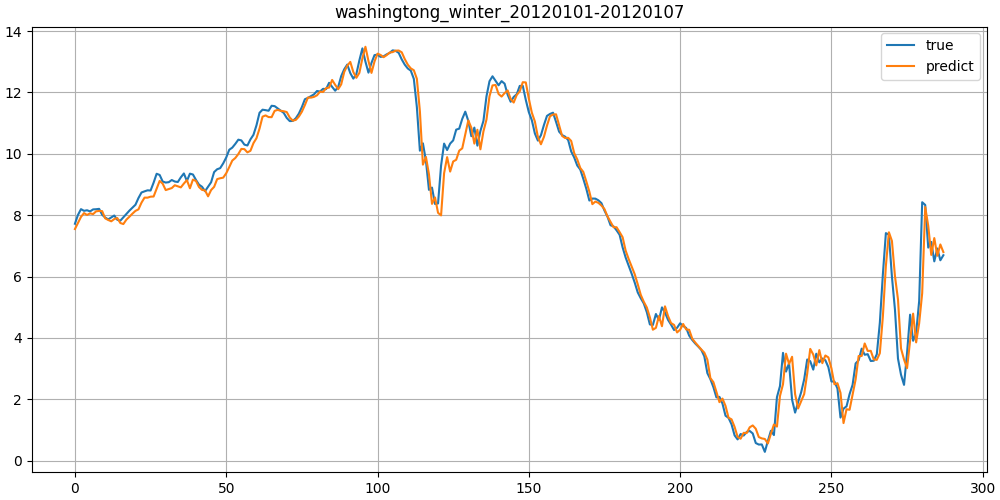

In [29]:
#  画出预测的图像，第二幅图为预测的图像，把缺失的数据补上
fig,ax = plt.subplots(figsize=(10, 5),layout='constrained')
ax.set_title("washingtong_winter_20120101-20120107")
ax.plot(y_test,label='true')
ax.plot(svr_predict,label='predict')
ax.grid()
ax.legend()
plt.show()

In [30]:
def cal_mse(y_hat, y):
    mse = (np.square(y_hat - y)).mean()
    return mse

In [31]:
mse = cal_mse(svr_predict, y_test)
mse

0.20064325066474387

In [33]:
# df = pd.DataFrame(data={
#                 'true_value': y_test,
#                 'predict': svr_predict
#             })
# df.to_csv("result/washingtong_winter_20120101-20120107.csv", index=False)